## Formative Assessment 1: Neural Network to CNN Progression

2021059121 | Bayquen, Christopher Gilbert A.

Objective: Guide students through building a basic neural network for structured data and then transition to using CNNs and transfer learning for image classification.


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from ucimlrepo import fetch_ucirepo

### **Importing the dataset and do data preprocessing**


In [13]:
# Load and preprocess data
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets['num']

# Convert to binary target: 0 (no disease), 1 (has disease)
y_binary = (y > 0).astype(int)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [15]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


**Train Test Split using PyTorch**


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

**Define ML Pipeline and Model**


In [17]:
# Define the MLP model
class HeartMLP(nn.Module):
    def __init__(self, input_dim):
        super(HeartMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = HeartMLP(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Training**


Epoch 1/50 - Train Loss: 0.7003 - Val Loss: 0.6764
Epoch 2/50 - Train Loss: 0.6977 - Val Loss: 0.6748
Epoch 3/50 - Train Loss: 0.6952 - Val Loss: 0.6732
Epoch 4/50 - Train Loss: 0.6927 - Val Loss: 0.6716
Epoch 5/50 - Train Loss: 0.6901 - Val Loss: 0.6701
Epoch 6/50 - Train Loss: 0.6876 - Val Loss: 0.6685
Epoch 7/50 - Train Loss: 0.6852 - Val Loss: 0.6669
Epoch 8/50 - Train Loss: 0.6827 - Val Loss: 0.6653
Epoch 9/50 - Train Loss: 0.6803 - Val Loss: 0.6638
Epoch 10/50 - Train Loss: 0.6778 - Val Loss: 0.6622
Epoch 11/50 - Train Loss: 0.6754 - Val Loss: 0.6606
Epoch 12/50 - Train Loss: 0.6729 - Val Loss: 0.6589
Epoch 13/50 - Train Loss: 0.6704 - Val Loss: 0.6573
Epoch 14/50 - Train Loss: 0.6679 - Val Loss: 0.6556
Epoch 15/50 - Train Loss: 0.6654 - Val Loss: 0.6538
Epoch 16/50 - Train Loss: 0.6629 - Val Loss: 0.6519
Epoch 17/50 - Train Loss: 0.6603 - Val Loss: 0.6500
Epoch 18/50 - Train Loss: 0.6577 - Val Loss: 0.6480
Epoch 19/50 - Train Loss: 0.6550 - Val Loss: 0.6460
Epoch 20/50 - Train L

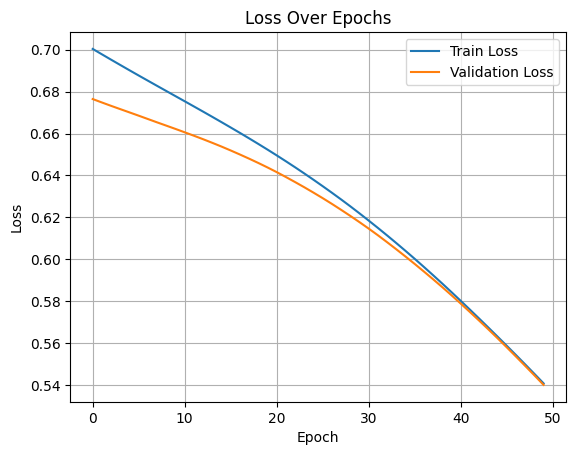

In [18]:
epochs = 50
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(X_test_tensor)
        val_loss = criterion(val_output, y_test_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {loss.item():.4f} - Val Loss: {val_loss.item():.4f}")

#Plot Loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


**Evaluation**


In [19]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor).numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

F1 Score: 0.7666666666666667


**Performance Analysis of the MLP Model**

1. Accuracy: 77%

  This is solid and suggests that the model is learning useful patterns from the data. However, accuracy alone can be misleading, especially if classes are imbalanced.

2. Class-Specific Performance

  - Class 0 (No Disease)
  
    **High recall (0.83):** The model is good at identifying most of the no-disease cases.

    **Lower precision (0.73):** It occasionally predicts no disease when disease is present (false negatives).
  
   - Class 1 (Has Disease)

    **High precision (0.82):** When it predicts disease, it's usually correct.

    **Lower recall (0.72):** It misses some disease cases (false negatives).

3.  F1 Score

  Overall F1 score = 0.77: This is the harmonic mean of precision and recall and gives a balanced measure of performance. The fact that both classes have F1 = 0.77 indicates that the model is performing evenly across both classes, which is a very good sign in binary classification.




**Interpretation**

The multi-layer perceptron (MLP) model achieved an overall accuracy of 77% on the UCI Heart Disease dataset, demonstrating a strong ability to distinguish between patients with and without heart disease. The model performed fairly evenly across both classes, with an F1 score of 0.77 for each, indicating balanced precision and recall. For class 0 (no heart disease), the model achieved a high recall of 0.83, meaning it correctly identified most of the non-disease cases, though its precision was slightly lower at 0.73, suggesting occasional false negatives. Conversely, for class 1 (presence of disease), the model showed strong precision at 0.82, meaning when it predicted disease, it was often correct; however, the recall dropped to 0.72, indicating that some actual disease cases were missed. This trade-off implies that while the model is cautious and avoids false alarms, it may under-detect true positive cases — which is a critical concern in medical contexts. Overall, the model shows promising results, but further improvements such as threshold tuning or using more advanced techniques like interpretability tools (e.g., SHAP) could enhance its utility in real-world healthcare applications.